Importar librerias


In [1]:
import numpy as np  # Librería para manejo de arreglos numéricos
import pandas as pd  # Librería para manipulación de datos en estructuras tipo DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error  # Función para calcular el error cuadrático medio (MSE)
from sklearn.linear_model import LinearRegression, ElasticNet  # Modelos de regresión lineal y Elastic Net
from sklearn.neighbors import KNeighborsRegressor  # Modelo de K Vecinos más Cercanos
from sklearn.cross_decomposition import PLSRegression  # Regresión de Mínimos Cuadrados Parciales (PLS)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Modelos de Random Forest y Gradient Boosting

ModuleNotFoundError: No module named 'sklearn'

Importar datos

In [2]:
df1 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Cordoba1")
df2 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Guajira2")
df3 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Guajira3")
df4 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Guajira4")
df5 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Antioquia5")
df6 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Antioquia6")
df7 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Atlantico7")
df8 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Atlantico8")
df9 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Magdalena9")
df10 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Magdalena10")
df11 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Cesar11")
df12 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Cesar12")
df13 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Bolivar13")
df14 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Bolivar14")
df15 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Choco15")

# Lista Df
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]

# Unirlos en uno solo
df = pd.concat(dfs, ignore_index=True)

In [3]:
df.head()

,Hoja,Station Number,Año,Día,Irradiacion,Min Temp,Max Temp,Temp Promedio,Vapor,Wind Speed,Precipitacion,Departamento,Irrigacion,Produccion,Toneladas por hectaria
0,2000,1,2000,183.5,4593.10,23.34,32.93,28.14,38.22,1.05,5.83,1,1,5969.732058,59.697321
1,2001,1,2001,183.0,4591.66,23.84,33.27,28.56,39.24,1.09,5.84,1,1,5625.796938,56.257969
2,2002,1,2002,183.0,4591.66,24.13,33.74,28.94,40.13,0.94,5.84,1,1,4309.850302,43.098503
3,2003,1,2003,183.0,4591.66,24.08,33.28,28.68,39.50,1.11,5.84,1,1,4121.129416,41.211294
4,2004,1,2004,183.5,4593.10,24.40,33.39,28.90,40.11,1.05,5.83,1,1,4565.883797,45.658838


Partimos los datos 

In [4]:
features = ['Max Temp', 'Min Temp', 'Vapor', 'Precipitacion', "Departamento", "Irrigacion"]
X = df[features]
y = df['Toneladas por hectaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #No entiendo random state 42

Modelo Regresión Lineal (Sin Interacciones)

In [5]:
# Crear y entrenar el modelo de regresión lineal sin interacciones
modelRL = LinearRegression()
modelRL.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelRL.predict(X_test)

# Evaluación del modelo
mse_rl = mean_squared_error(y_test, y_pred)
rmse_rl = np.sqrt(mse_rl)

print(f"MSE: {mse_rl}")
print(f"RMSE: {rmse_rl}")

MSE: 196.4059235304503
RMSE: 14.014489770607074


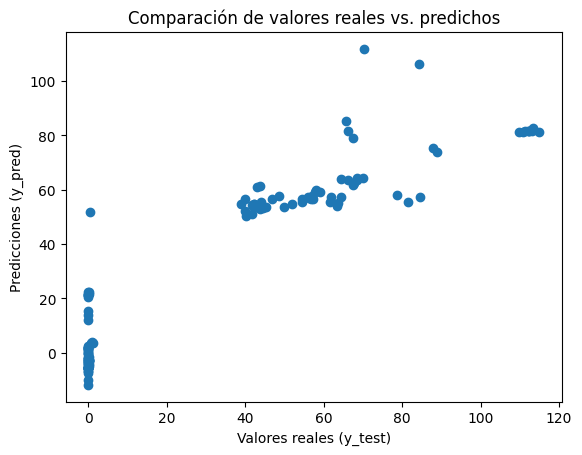

In [6]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Modelo Regresión Lineal (Con Interacciones de Segundo grado)

In [7]:
# Aplicar transformación polinómica de segundo grado (incluye términos de interacción)
poly = PolynomialFeatures(degree=2, include_bias=False)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con interacciones
modelRL = LinearRegression()
modelRL.fit(X_train_poly, y_train)

# Predicciones en los datos de prueba
y_pred = modelRL.predict(X_test_poly)

# Evaluación del modelo
mse_rl2 = mean_squared_error(y_test, y_pred)
rmse_rl2 = np.sqrt(mse_rl2)

print(f"MSE: {mse_rl2}")
print(f"RMSE: {rmse_rl2}")

MSE: 220.9844996649901
RMSE: 14.865547405494024


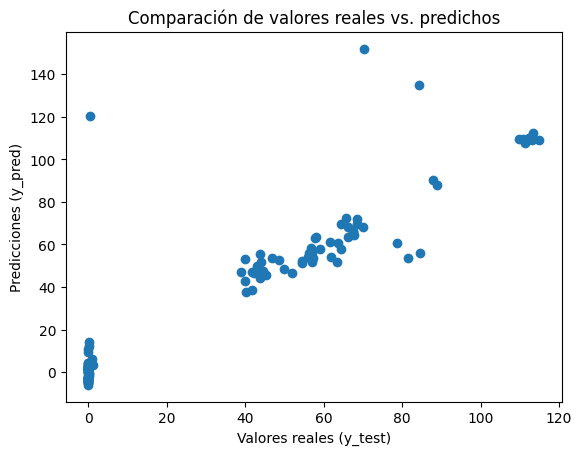

In [8]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Modelo Regresión Lineal (Con Interacciones de Tercer grado)

In [9]:
# Aplicar transformación polinómica de tercer grado
poly = PolynomialFeatures(degree=3, include_bias=False)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con interacciones de tercer grado
modelRL = LinearRegression()
modelRL.fit(X_train_poly, y_train)

# Predicciones en los datos de prueba
y_pred = modelRL.predict(X_test_poly)

# Evaluación del modelo
mse_rl3 = mean_squared_error(y_test, y_pred)
rmse_rl3 = np.sqrt(mse_rl3)

print(f"MSE: {mse_rl3}")
print(f"RMSE: {rmse_rl3}")

MSE: 169.76192836071937
RMSE: 13.029271981224406


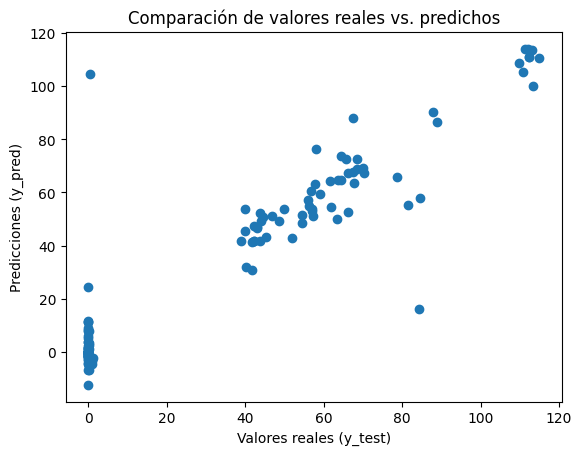

In [10]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Random Forest

In [11]:
# Crear y entrenar el modelo de Random Forest
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 árboles
modelRF.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelRF.predict(X_test)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)

print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")

MSE: 92.19970973309867
RMSE: 9.602067992526333


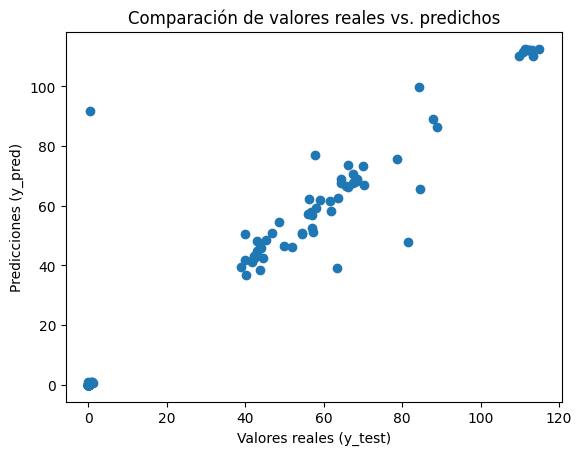

In [12]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Elastic Net

In [13]:
#Encontrar los mejores parametros
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  
    'l1_ratio': [0.2, 0.5, 0.8]
}

grid_search = GridSearchCV(ElasticNet(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

Mejores parámetros: {'alpha': 0.1, 'l1_ratio': 0.8}


In [14]:
# Crear y entrenar el modelo Elastic Net
modelEN = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)  # α controla la regularización, l1_ratio mezcla L1 y L2
modelEN.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelEN.predict(X_test)

# Evaluación del modelo
mse_en = mean_squared_error(y_test, y_pred)
rmse_en = np.sqrt(mse_en)

print(f"MSE: {mse_en}")
print(f"RMSE: {rmse_en}")

MSE: 207.00887287027302
RMSE: 14.387802920191568


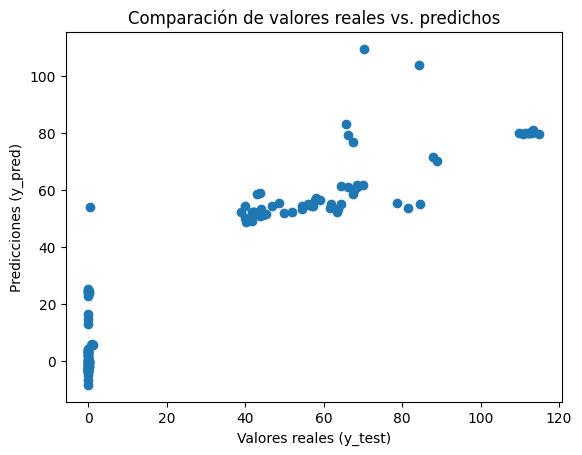

In [15]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

KNN

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Mejor valor de k: {best_k}")

Mejor valor de k: 5


In [17]:
# Crear y entrenar el modelo KNN con k=5
modelKNN = KNeighborsRegressor(n_neighbors=best_k)  # k=5 vecinos
modelKNN.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelKNN.predict(X_test)

# Evaluación del modelo
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")

MSE: 281.59542033662996
RMSE: 16.780805115864673


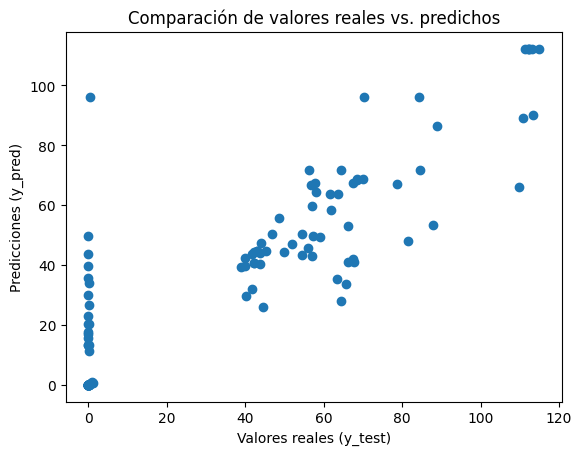

In [18]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

PLS

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_components': range(1, X_train.shape[1] + 1)}
grid_search = GridSearchCV(PLSRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_n = grid_search.best_params_['n_components']
print(f"Mejor número de componentes: {best_n}")

Mejor número de componentes: 3


In [20]:
# Crear y entrenar el modelo PLS con 2 componentes
modelPLS = PLSRegression(n_components=best_n)  # n_components define cuántas combinaciones lineales usar
modelPLS.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelPLS.predict(X_test)

# Evaluación del modelo
mse_pls = mean_squared_error(y_test, y_pred)
rmse_pls = np.sqrt(mse_pls)

print(f"MSE: {mse_pls}")
print(f"RMSE: {rmse_pls}")

MSE: 189.94054568655213
RMSE: 13.781891948733023


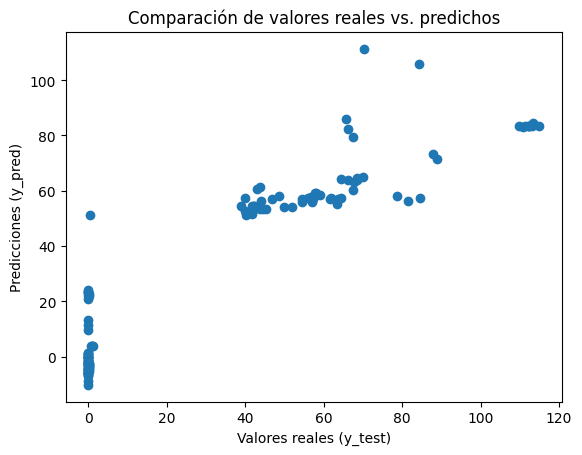

In [21]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Boosted Trees

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)
best_learning_rate = grid_search.best_params_['learning_rate']
best_max_depth = grid_search.best_params_['max_depth']
best_n_estimators = grid_search.best_params_['n_estimators']

Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [23]:
# Crear y entrenar el modelo Boosted Trees
modelBoosted = GradientBoostingRegressor(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth, random_state=42)
modelBoosted.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelBoosted.predict(X_test)

# Evaluación del modelo
mse_bt = mean_squared_error(y_test, y_pred)
rmse_bt = np.sqrt(mse_bt)

print(f"MSE: {mse_bt}")
print(f"RMSE: {rmse_bt}")

MSE: 124.14785492852877
RMSE: 11.142165630097624


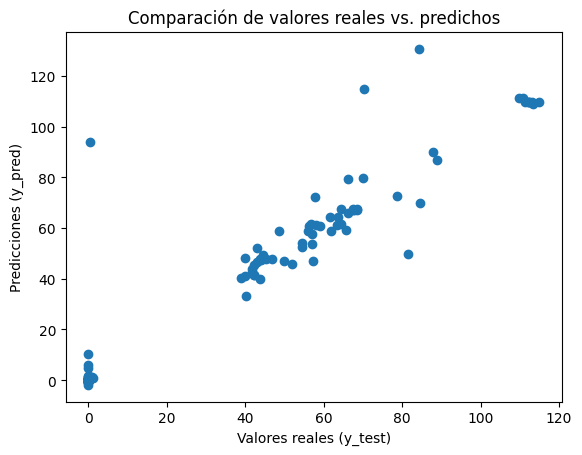

In [24]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Encontrar el Mejor Modelo

In [25]:
# Guardar los resultados de cada modelo
resultados = {
    "Regresión Lineal": {"MSE": mse_rl, "RMSE": rmse_rl},
    "Regresión Lineal (2° grado)": {"MSE": mse_rl2, "RMSE": rmse_rl2},
    "Regresión Lineal (3° grado)": {"MSE": mse_rl3, "RMSE": rmse_rl3},
    "Random Forest": {"MSE": mse_rf, "RMSE": rmse_rf},
    "Elastic Net": {"MSE": mse_en, "RMSE": rmse_en},
    "KNN": {"MSE": mse_knn, "RMSE": rmse_knn},
    "PLS": {"MSE": mse_pls, "RMSE": rmse_pls},
    "Boosted Trees": {"MSE": mse_bt, "RMSE": rmse_bt}
}

# Ordenar por RMSE (menor es mejor)
mejor_modelo = min(resultados, key=lambda x: resultados[x]["RMSE"])

# Mostrar resultados
for modelo, errores in resultados.items():
    print(f"{modelo}: MSE = {errores['MSE']:.4f}, RMSE = {errores['RMSE']:.4f}")

print(f"\nEl mejor modelo es: {mejor_modelo} con RMSE de {resultados[mejor_modelo]['RMSE']:.4f}")

Regresión Lineal: MSE = 196.4059, RMSE = 14.0145
Regresión Lineal (2° grado): MSE = 220.9845, RMSE = 14.8655
Regresión Lineal (3° grado): MSE = 169.7619, RMSE = 13.0293
Random Forest: MSE = 92.1997, RMSE = 9.6021
Elastic Net: MSE = 207.0089, RMSE = 14.3878
KNN: MSE = 281.5954, RMSE = 16.7808
PLS: MSE = 189.9405, RMSE = 13.7819
Boosted Trees: MSE = 124.1479, RMSE = 11.1422

El mejor modelo es: Random Forest con RMSE de 9.6021


Ya que el mejor modelo es Random Forest, se prosigue a obtener las varibales significativas

In [26]:
# Crear y entrenar el modelo de Random Forest
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 árboles
modelRF.fit(X_train, y_train)

# Obtener importancias
importancias = modelRF.feature_importances_

# Asociar con nombres de variables
importancia_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
})
# Ordenar de mayor a menor
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Mostrar
print(importancia_df)

        Variable  Importancia
5     Irrigacion     0.766803
0       Max Temp     0.110895
3  Precipitacion     0.078943
2          Vapor     0.023606
1       Min Temp     0.016228
4   Departamento     0.003526


Heuristica Forward

In [1]:
import numpy as np  # Librería para manejo de arreglos numéricos
import pandas as pd  # Librería para manipulación de datos en estructuras tipo DataFrame
import matplotlib.pyplot as plt

df1 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Cordoba1")
df2 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Guajira2")
df3 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Guajira3")
df4 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Guajira4")
df5 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Antioquia5")
df6 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Antioquia6")
df7 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Atlantico7")
df8 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Atlantico8")
df9 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Magdalena9")
df10 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Magdalena10")
df11 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Cesar11")
df12 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Cesar12")
df13 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Bolivar13")
df14 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Bolivar14")
df15 = pd.read_excel("Datos sin irrigacion.xlsx", sheet_name = "Resumen_Choco15")

# Lista Df
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]

# Unirlos en uno solo
df = pd.concat(dfs, ignore_index=True)

In [2]:
features = ['Max Temp', 'Min Temp', 'Vapor', 'Precipitacion', "Departamento", "Irrigacion"]
X = df[features]
y = df['Toneladas por hectaria']

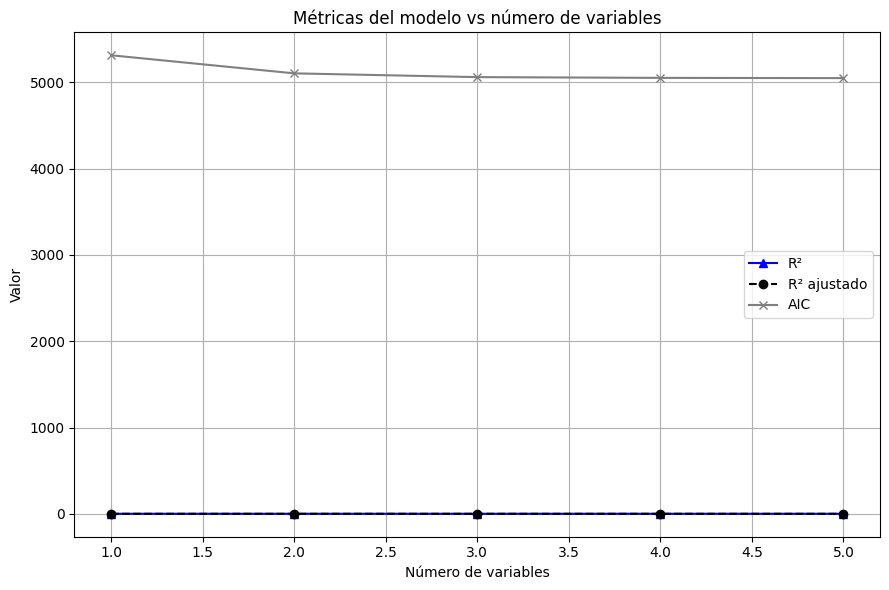

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Inicializar
remaining = list(X.columns)
selected = []
r2_list = []
adj_r2_list = []
aic_list = []
num_vars = []

# Selección forward paso a paso
while remaining:
    best_pval = float('inf')
    best_candidate = None
    best_model = None

    for candidate in remaining:
        formula = selected + [candidate]
        X_model = sm.add_constant(X[formula])
        model = sm.OLS(y, X_model).fit()
        pval = model.pvalues[candidate]
        if pval < 0.05 and pval < best_pval:
            best_candidate = candidate
            best_pval = pval
            best_model = model

    if best_candidate:
        selected.append(best_candidate)
        remaining.remove(best_candidate)

        r2_list.append(best_model.rsquared)
        adj_r2_list.append(best_model.rsquared_adj)
        aic_list.append(best_model.aic)
        num_vars.append(len(selected))
    else:
        break

# Gráfica como la que mostraste
plt.figure(figsize=(9, 6))
plt.plot(num_vars, r2_list, marker='^', label="R²", color='blue')
plt.plot(num_vars, adj_r2_list, marker='o', linestyle='--', label="R² ajustado", color='black')
plt.plot(num_vars, aic_list, marker='x', label="AIC", color='gray')
plt.xlabel("Número de variables")
plt.ylabel("Valor")
plt.title("Métricas del modelo vs número de variables")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
